In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import nengo
from nengo.dists import Choice
from nengo.utils.ensemble import response_curves, tuning_curves

In [5]:
with nengo.Network() as net:
    ens1 = nengo.Ensemble(20, dimensions=2, seed=0)
    ens2 = nengo.Ensemble(15, dimensions=2)

    # Decoded ensemble to ensemble connection
    conn1 = nengo.Connection(ens1, ens2, function=lambda x: x + 0.5)

with nengo.Simulator(net) as sim:
    decoders = sim.data[conn1].weights

with net:
    # Direct neurons to ensemble connection
    conn2 = nengo.Connection(ens1.neurons, ens2, transform=decoders)

/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [6]:
decoders.shape

(2, 20)

# How does a nengo neuron process and output vectors?

# 2D Tuning curve
The tuning curve is a scalar field.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Firing rate (Hz)')

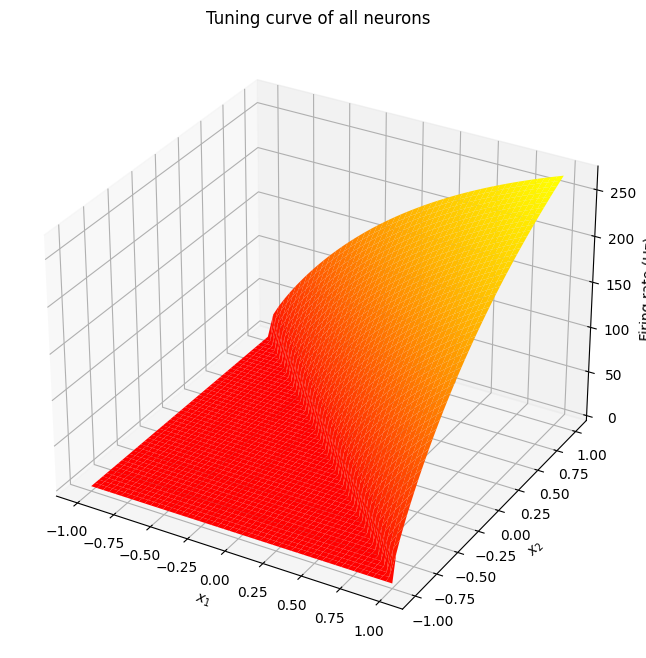

In [16]:
model = nengo.Network()
with model:
    ens_2d = nengo.Ensemble(1, dimensions=2, encoders=Choice([[1,1]]),intercepts=Choice([1,0]))
with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(ens_2d, sim)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection="3d")
ax.set_title("Tuning curve of all neurons")
for i in range(ens_2d.n_neurons):
    ax.plot_surface(
        eval_points.T[0], eval_points.T[1], activities.T[i], cmap=plt.cm.autumn
    )
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("Firing rate (Hz)")